In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**importing dependencies**

In [88]:
import tensorflow
import numpy
import requests
import matplotlib.pyplot

**getting the source :-  PRIDE and PREJUDICE**

In [46]:
url = "http://www.gutenberg.org/files/1342/1342-0.txt"
response = requests.get(url)
text = response.text

In [47]:
len(text)

752583

**shortning of the text due to computational power barriers**

In [48]:
text[1725:5000]

'\n_Walt Whitman has somewhere a fine and just distinction between â\x80\x9cloving\r\nby allowanceâ\x80\x9d and â\x80\x9cloving with personal love.â\x80\x9d This distinction applies\r\nto books as well as to men and women; and in the case of the not very\r\nnumerous authors who are the objects of the personal affection, it\r\nbrings a curious consequence with it. There is much more difference as\r\nto their best work than in the case of those others who are loved â\x80\x9cby\r\nallowanceâ\x80\x9d by convention, and because it is felt to be the right and\r\nproper thing to love them. And in the sect--fairly large and yet\r\nunusually choice--of Austenians or Janites, there would probably be\r\nfound partisans of the claim to primacy of almost every one of the\r\nnovels. To some the delightful freshness and humour of_ Northanger\r\nAbbey, _its completeness, finish, and_ entrain, _obscure the undoubted\r\ncritical facts that its scale is small, and its scheme, after all, that\r\nof burles

In [49]:
text=text[1725:5000]

**preprocessing the text removing space symbols and adding real spaces**

In [50]:
import re
text = re.sub(r'\s+', ' ', text)
text = re.sub(r'\d', '', text)
text = text.lower()

In [51]:
text

' _walt whitman has somewhere a fine and just distinction between â\x80\x9cloving by allowanceâ\x80\x9d and â\x80\x9cloving with personal love.â\x80\x9d this distinction applies to books as well as to men and women; and in the case of the not very numerous authors who are the objects of the personal affection, it brings a curious consequence with it. there is much more difference as to their best work than in the case of those others who are loved â\x80\x9cby allowanceâ\x80\x9d by convention, and because it is felt to be the right and proper thing to love them. and in the sect--fairly large and yet unusually choice--of austenians or janites, there would probably be found partisans of the claim to primacy of almost every one of the novels. to some the delightful freshness and humour of_ northanger abbey, _its completeness, finish, and_ entrain, _obscure the undoubted critical facts that its scale is small, and its scheme, after all, that of burlesque or parody, a kind in which the first

In [52]:
len(text)

3216

**adding text vectorization to the text (converting strings to text)**

In [53]:
txt_vector=tensorflow.keras.layers.TextVectorization(max_tokens=None,
                                                    output_mode='int',
                                                    output_sequence_length=None)

In [54]:
txt_vector.adapt([text])

In [55]:
txt_vector.vocabulary_size()

292

In [56]:
k=txt_vector([text])[0].numpy()

In [57]:
sequence=[]

In [58]:
for i in range(1,len(k)):
    pp=k[:i].tolist()
    sequence.append(pp)

In [59]:
max_length=len(sequence[len(sequence)-1])

In [60]:
max_length

539

**adding padding to the sequences**

In [61]:
padding=tensorflow.keras.preprocessing.sequence.pad_sequences(sequence,maxlen=max_length,padding='pre')

In [62]:
padding.shape

(539, 539)

**making training and labels**

In [63]:
train,label=padding[:,:-1],padding[:,-1]


In [64]:
label[0]

83

In [65]:
label=tensorflow.keras.utils.to_categorical(label,num_classes=txt_vector.vocabulary_size())

In [66]:
label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**making an embedding layer for the model**

In [67]:
emb=tensorflow.keras.layers.Embedding(input_dim=txt_vector.vocabulary_size(),output_dim=128)

**making the archetecture of the model**

In [68]:
input=tensorflow.keras.layers.Input(shape=(1,))
x=emb(input)
x=tensorflow.keras.layers.LSTM(128)(x)
x=tensorflow.keras.layers.Flatten()(x)
output=tensorflow.keras.layers.Dense(txt_vector.vocabulary_size(),activation='softmax')(x)

In [69]:
model=tensorflow.keras.Model(input,output)

In [85]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 1, 128)         │        37,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 292)            │        37,668 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,886 (2.36 MB)

 Trainable params: 206,628 (807.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 413,258 (1.58 MB)

In [70]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),
             loss=tensorflow.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [71]:
history=model.fit(train,label,epochs=100)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0314 - loss: 5.6707
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0771 - loss: 5.3605
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0737 - loss: 5.1359
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0825 - loss: 5.1096
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0757 - loss: 5.1040
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0792 - loss: 5.0328
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0705 - loss: 5.0718
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0738 - loss: 5.0717
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0922 - loss: 5.0491
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0946 - loss: 4.8587
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1230 - loss: 4.6788
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

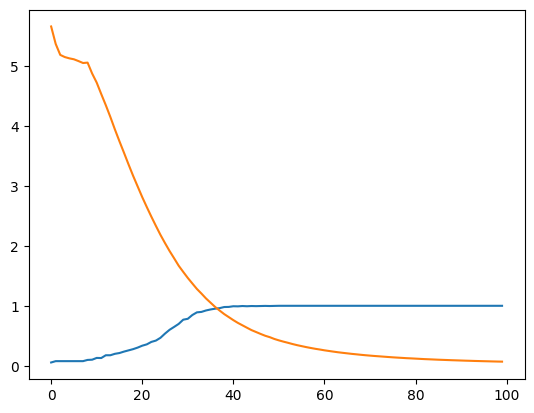

In [89]:
dev,harsh=matplotlib.pyplot.subplots()
harsh.plot(history.history['accuracy'])
harsh.plot(history.history['loss'])
matplotlib.pyplot.show()

**model writting an essay of a 100 words by the help of only 3 words**

In [84]:
no_words=100
words="walt whitman has"
for i in range(no_words):
        vector= txt_vector([words])
        padding= tensorflow.keras.preprocessing.sequence.pad_sequences(vector, maxlen=max_length, padding='pre')
        predicted = model.predict(padding, verbose=0)
        index = np.argmax(predicted, axis=1)[0]
        predicted_word = txt_vector.get_vocabulary()[index]
        words += " " + predicted_word


print(words)

walt whitman has somewhere a fine and just distinction between âloving by allowanceâ and âloving with personal loveâ this distinction applies to books as well as to men and women and in the case of the not very numerous authors who are the objects of the personal affection it brings a curious consequence with it there is much more difference as to their best work than in the case of those others who are loved âby allowanceâ by convention and because it is felt to be the right and proper thing to love them and in the sectfairly large and yet unusually choiceof
